In [18]:
import numpy as np
import pandas as pd
import sys
sys.path.insert(1, 'scripts/')
from gen_matrix import matrix_gen, get_ICA
from get_sample import get_sample, create_strings_for_dataset
from fft import fft_for_sample
from tqdm import tqdm_notebook as tqdm
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
from sklearn.ensemble import RandomForestClassifier

%matplotlib inline

In [4]:
EEG = matrix_gen()
ICA = get_ICA()

class_ = 20000//3
class1 = [0,class_]
class2 = [class_,class_*2]
class3 = [class_*2, EEG.shape[1]]

print(class1, class2, class3)

[0, 6666] [6666, 13332] [13332, 19998]


In [5]:
#Перемножаем ICA и EEG матрицы
matrix = np.matmul(ICA, EEG)
#Разбиваем на матрицы классов, чтоб проще было делить на семплы
matrix_class1 = matrix[:,0:class_]
matrix_calss2 = matrix[:, class_:class_*2]
matrix_calss3 = matrix[:, class_*2:EEG.shape[1]]

In [6]:
#Получаю семплы для каждого класса
sample_calss1 = get_sample(matrix_class1)
sample_calss2 = get_sample(matrix_calss2)
sample_calss3 = get_sample(matrix_calss3)

In [7]:
print(len(sample_calss1), len(sample_calss2), len(sample_calss3))

34 34 34


In [8]:
#Преобразование Фурье
samples_fft = list(map(abs, fft_for_sample(sample_calss1 + sample_calss2 + sample_calss3, first_n_elements=20)))

In [9]:
sample_calss1_fft = samples_fft[:34]
sample_calss2_fft = samples_fft[34:34*2]
sample_calss3_fft = samples_fft[34*2:]

print(len(sample_calss1_fft), len(sample_calss2_fft), len(sample_calss3_fft))

34 34 34


In [10]:
#Преобразование Фурье
# sample_calss1_fft = fft_for_sample(sample_calss1, first_n_elements=20)
# sample_calss2_fft = fft_for_sample(sample_calss2, first_n_elements=20)
# sample_calss3_fft = fft_for_sample(sample_calss3, first_n_elements=20)

In [11]:
#Создание строк для датасета, из матрицы 128*20 -> в вектор 2560
sample_calss1_fft_str = create_strings_for_dataset(sample_calss1_fft)
sample_calss2_fft_str = create_strings_for_dataset(sample_calss2_fft)
sample_calss3_fft_str = create_strings_for_dataset(sample_calss3_fft)

In [12]:
#Создание таблицы объекты-признаки

#Класс 1
data_class_1 = pd.DataFrame(data=np.zeros((34, 2560)))
data_class_1['label'] = 1

for i in tqdm(range(len(sample_calss1_fft_str))):
    data_class_1.loc[i, :-1] = sample_calss1_fft_str[i]
    
    
#Класс 2
data_class_2 = pd.DataFrame(data=np.zeros((34, 2560)))
data_class_2['label'] = 2

for i in tqdm(range(len(sample_calss2_fft_str))):
    data_class_2.loc[i, :-1] = sample_calss2_fft_str[i]
    
    
#Класс 3
data_class_3 = pd.DataFrame(data=np.zeros((34, 2560)))
data_class_3['label'] = 3

for i in tqdm(range(len(sample_calss3_fft_str))):
    data_class_3.loc[i, :-1] = sample_calss3_fft_str[i]
    
    
data = pd.concat([data_class_1, data_class_2, data_class_3], axis=0)
print(data.shape)
data.head(5)

/Users/aleksandrbojko/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:7: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  import sys


HBox(children=(IntProgress(value=0, max=34), HTML(value='')))

/Users/aleksandrbojko/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:15: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  from ipykernel import kernelapp as app


HBox(children=(IntProgress(value=0, max=34), HTML(value='')))

/Users/aleksandrbojko/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:23: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`


HBox(children=(IntProgress(value=0, max=34), HTML(value='')))


(102, 2561)


,0,1,2,3,4,5,6,7,8,9,...,2551,2552,2553,2554,2555,2556,2557,2558,2559,label
0,394.452385,396.098746,387.082417,410.134506,402.189635,399.164904,383.537450,399.405594,395.926134,405.412090,...,0.150177,0.224724,0.258735,0.211662,0.221355,0.193798,0.246019,0.232585,0.200109,1
1,394.460238,396.076440,387.030379,410.108193,402.165791,399.097560,383.562836,399.385162,395.885656,405.362719,...,0.148221,0.219439,0.133694,0.235345,0.169106,0.195587,0.196233,0.183256,0.175694,1
2,394.866305,396.604773,387.600273,410.526160,402.610551,399.580248,383.898792,399.871098,396.423813,405.783657,...,0.136896,0.137935,0.151524,0.134174,0.169039,0.077345,0.104020,0.163732,0.206627,1
3,394.992320,396.785834,387.824647,410.729369,402.807549,399.705835,384.102950,399.985627,396.551709,405.971610,...,0.307364,0.246287,0.255634,0.282266,0.283248,0.259885,0.260317,0.312090,0.281526,1
4,394.541573,396.320626,387.325916,410.220295,402.298584,399.205523,383.667218,399.527621,396.116460,405.437525,...,0.394845,0.452627,0.395186,0.357262,0.353412,0.412559,0.371422,0.376868,0.382428,1


In [13]:
#Понизим размерность до 60 компонент
PCA = PCA(n_components=60)
data_pca = PCA.fit_transform((data).iloc[:, :-1])

In [14]:
data_pca = pd.DataFrame(data_pca)
# data_pca['label'] = data['label'].values
labels = data['label'].values

In [82]:
#Обучим LDA
LDA = LDA()
LDA.fit(data_pca, labels)

LinearDiscriminantAnalysis(n_components=None, priors=None, shrinkage=None,
                           solver='svd', store_covariance=False, tol=0.0001)

In [15]:
#Посмотрим важные признаки с помощью RF
rf = RandomForestClassifier()
rf.fit(data_pca, labels)

/Users/aleksandrbojko/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=10,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

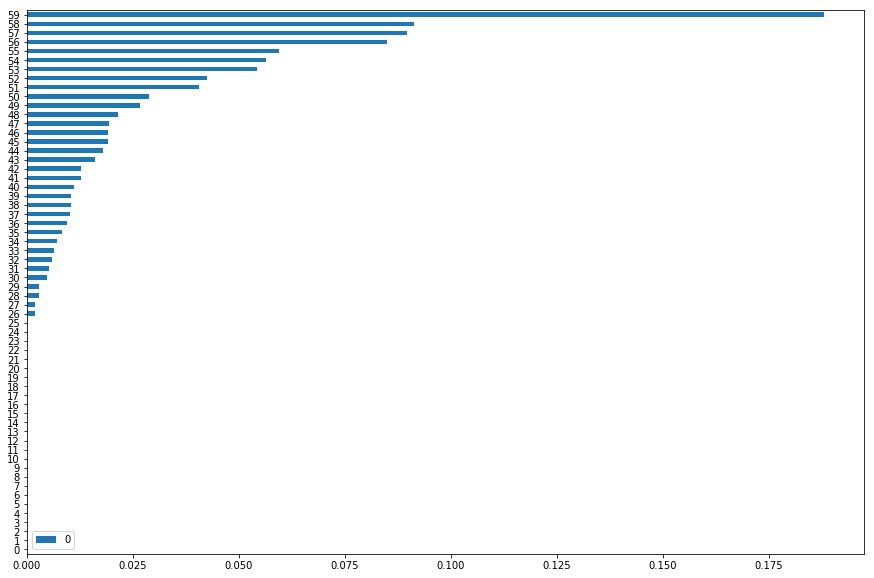

In [16]:
pd.DataFrame(sorted(rf.feature_importances_)).plot(kind='barh', figsize=(15,10))

In [24]:
## Сделаем соответсвие между главными компонентами и исходными признаками
train_features = (data).iloc[:, :-1].values

model = PCA(n_components=60).fit(train_features)
X_pc = model.transform(train_features)

In [ ]:
# Будем рассматривать матрицу pca_model.components, это матрица которая позволяет перейти в другое пространство
# Ее размерность (60, 2560), каждая строка матрицы это одна из компонент PCA, каждое значение в отдельной ячейке
# это вес вклада в эту компоненту, 1 из 2560 признаков старой матрицы.
# Возмем trashold и будем отбирать только те значение, которые превосходят эту костанту

In [107]:
components_easy_trashold = []
for component_number in tqdm(range(60)):
    trashold = np.mean(abs(model.components_[component_number]))/10
    features_in_component = []
    
    for idx, value in enumerate(model.components_[component_number]):
        if abs(value) > trashold:
            features_in_component.append(idx)
    components_easy_trashold.append(features_in_component)

/Users/aleksandrbojko/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:2: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  


HBox(children=(IntProgress(value=0, max=60), HTML(value='')))

In [160]:
components_hard_trashold = []
for component_number in tqdm(range(60)):
    trashold = np.max(abs(model.components_[component_number])) - 0.05
    features_in_component = []
    
    for idx, value in enumerate(model.components_[component_number]):
        if abs(value) > trashold:
            features_in_component.append(idx)
    components_hard_trashold.append(features_in_component)

/Users/aleksandrbojko/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:2: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  


HBox(children=(IntProgress(value=0, max=60), HTML(value='')))

In [217]:
# Получим соответсвие компонент и важных для них признаков, по заданному трешхолду

for component_number, i in enumerate(components_hard_trashold):
    if component_number > 57:
        print('component_number:', component_number, 'features:', i)
        print()

component_number: 58 features: [1, 9, 10, 21, 24, 25, 32, 35, 36, 40, 41, 43, 45, 53, 56, 61, 63, 66, 70, 74, 75, 76, 78, 79, 81, 82, 85, 87, 92, 94, 97, 98, 99, 101, 103, 105, 108, 109, 112, 113, 114, 116, 117, 121, 122, 123, 126, 133, 136, 137, 139, 140, 144, 145, 146, 148, 151, 153, 159, 162, 164, 165, 181, 182, 185, 187, 190, 193, 196, 197, 198, 199, 201, 204, 206, 211, 214, 216, 219, 221, 223, 226, 230, 231, 233, 234, 237, 240, 242, 244, 248, 250, 253, 256, 257, 258, 259, 261, 262, 263, 266, 268, 270, 271, 273, 275, 279, 282, 285, 287, 289, 290, 291, 292, 293, 297, 300, 301, 304, 305, 311, 314, 315, 324, 325, 326, 335, 336, 339, 342, 345, 347, 348, 349, 353, 356, 358, 359, 365, 368, 373, 375, 378, 384, 386, 389, 391, 394, 399, 400, 403, 411, 412, 413, 414, 418, 419, 420, 430, 440, 443, 444, 446, 447, 448, 449, 452, 458, 461, 463, 468, 469, 472, 476, 477, 478, 479, 480, 481, 482, 485, 488, 489, 491, 494, 495, 500, 502, 505, 508, 511, 513, 515, 519, 523, 524, 525, 526, 534, 540, 541

In [166]:
## Возьмем Топ-5 компонент и пересечем их по признакам

# set(components_easy_trashold[-1]) & set(components_easy_trashold[-2]) & set(components_easy_trashold[-3]) & \
# set(components_easy_trashold[-4]) & set(components_easy_trashold[-5])


In [ ]:
## Теперь будем брать 5,4,3 лучшие компоненты, по мнениею RF, и пересекать их по признакам
## так мы сможем выяснить, какие признаки оказывают влияние на все самые главные компоненты

In [168]:
## Возьмем Топ-5 компонент и пересечем их по признакам (по жесткому трешхолду)


top_5 = set(components_hard_trashold[-1]) & set(components_hard_trashold[-2]) & set(components_hard_trashold[-3]) & \
set(components_hard_trashold[-4]) & set(components_hard_trashold[-5])
print(top_5)

{546, 258, 196, 165, 1669, 291, 2466, 1510, 978, 185, 990}


In [169]:
## Возьмем Топ-4 компонент и пересечем их по признакам
top_4 = set(components_hard_trashold[-2]) & set(components_hard_trashold[-3]) & \
set(components_hard_trashold[-4]) & set(components_hard_trashold[-5])

In [170]:
## Возьмем Топ-3 компонент и пересечем их по признакам
top_3 = set(components_hard_trashold[-3]) & \
set(components_hard_trashold[-4]) & set(components_hard_trashold[-5])

In [202]:
## Теперь возьмем худшие 3 компоненты, которые по мнению RF
## абсолютно не вносят вклад в модель и вычтим множетсва лучших из множетсва худших.
## Тогда у нас должны остаться по настоящему важные признаки

bad_components = []
for i in components_hard_trashold[:2]:
    for j in i:
        bad_components.append(j)

bad_components = set(bad_components)

len(bad_components)

1121

In [221]:
## Так выглядит вычитание множетсв лучших 3х компонент и худших 3х компонент, 
## возможно это и есть главные признаки в модели

best_features = np.array(list(top_3 - bad_components))
print(best_features)

[1669  528  546 2466 2085  165 1450 1324  557 1581 1459  185 1978  827
  196 1989 2120  840 1738 1484 1486 2003  212 1498  611 2020 1510 1768
 1521  628 2167 1784 2170 1662 1399]


In [19]:
## Сделаем соответсвие между главными компонентами и исходными признаками


# train_features = (data).iloc[:, :-1].values

# model = PCA(n_components=60).fit(train_features)
# X_pc = model.transform(train_features)

# # number of components
# n_pcs= model.components_.shape[0]

# # get the index of the most important feature on EACH component
# # LIST COMPREHENSION HERE
# most_important = [np.abs(model.components_[i]).argmax() for i in range(n_pcs)]

# initial_feature_names = list(map(str, np.arange(0, 2561)))
# # get the names
# most_important_names = [initial_feature_names[most_important[i]] for i in range(n_pcs)]

# # LIST COMPREHENSION HERE AGAIN
# dic = {'PC{}'.format(i): most_important_names[i] for i in range(n_pcs)}

# # build the dataframe
# df = pd.DataFrame(dic.items())
# df.columns = ['PCA_features', 'Original_features']

In [ ]:
## Найдем эти значение этих признаков в исходной матрице

In [224]:
train_features = pd.DataFrame(train_features)

In [225]:
### Главные признаки, с которыми будем рабоать 
### 1669  528  546 2466 2085  165 
### 1450 1324  557 1581 1459  185 1978  827
###  196 1989 2120  840 1738 1484 1486 2003 
### 212 1498  611 2020 1510 1768
### 1521  628 2167 1784 2170 1662 1399


for number_feature in list(best_features):
    train_features.iloc[:, number_feature] = train_features.iloc[:, number_feature].apply(lambda x: str(x) +
                                                                                          '_FE').values

# train_features.iloc[:, 1669] = train_features.iloc[:, 1669].apply(lambda x: str(x) + '_FE').values

In [226]:
train_features

,0,1,2,3,4,5,6,7,8,9,...,2550,2551,2552,2553,2554,2555,2556,2557,2558,2559
0,394.452385,396.098746,387.082417,410.134506,402.189635,399.164904,383.537450,399.405594,395.926134,405.412090,...,0.198628,0.150177,0.224724,0.258735,0.211662,0.221355,0.193798,0.246019,0.232585,0.200109
1,394.460238,396.076440,387.030379,410.108193,402.165791,399.097560,383.562836,399.385162,395.885656,405.362719,...,0.183402,0.148221,0.219439,0.133694,0.235345,0.169106,0.195587,0.196233,0.183256,0.175694
2,394.866305,396.604773,387.600273,410.526160,402.610551,399.580248,383.898792,399.871098,396.423813,405.783657,...,0.164600,0.136896,0.137935,0.151524,0.134174,0.169039,0.077345,0.104020,0.163732,0.206627
3,394.992320,396.785834,387.824647,410.729369,402.807549,399.705835,384.102950,399.985627,396.551709,405.971610,...,0.289487,0.307364,0.246287,0.255634,0.282266,0.283248,0.259885,0.260317,0.312090,0.281526
4,394.541573,396.320626,387.325916,410.220295,402.298584,399.205523,383.667218,399.527621,396.116460,405.437525,...,0.401266,0.394845,0.452627,0.395186,0.357262,0.353412,0.412559,0.371422,0.376868,0.382428
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
97,2.963165,2.974251,2.909092,3.079402,3.019332,2.998835,2.880736,2.999084,2.972804,3.043786,...,0.005722,0.004294,0.005669,0.004701,0.006840,0.004263,0.005606,0.005092,0.005437,0.004380
98,2.970174,2.981612,2.915052,3.087966,3.026570,3.005532,2.888921,3.007349,2.981737,3.052160,...,0.002992,0.002550,0.003213,0.004390,0.003401,0.001581,0.003816,0.002944,0.003839,0.004307
99,2.513043,2.521617,2.465967,2.611462,2.560129,2.542157,2.442451,2.542311,2.521745,2.580217,...,0.001863,0.002245,0.001085,0.000613,0.001943,0.002397,0.001756,0.001903,0.001996,0.001851
100,1.432652,1.437769,1.405617,1.488575,1.459286,1.448774,1.391981,1.449021,1.438173,1.470564,...,0.001676,0.001861,0.000939,0.000441,0.001206,0.001899,0.001147,0.001745,0.002006,0.000479


In [227]:
### Восстановим исходный вид таблицы, а именно 128x20x100 (102 в данном примере)

old_table = []
for i in range(train_features.shape[0]):
    sample = pd.DataFrame(np.zeros((128, 20)))
    string = train_features.iloc[i, :]
    
    index_start = 0
    index_end = 128

        
    for s in range(20):
        sample.iloc[:, s] = string.iloc[index_start : index_end].values
        index_start = index_end
        index_end += 128

        if index_end > 2560:
            break

    old_table.append(sample.values)
  

In [228]:
### Найдем в исходной таблице важный признак

FE_items = []


for table_number, table in tqdm(enumerate(old_table)):
    for column in range(table.shape[1]):
        for idx in range(table.shape[0]):
            if len(str(table[idx, column]).split('_')) > 1:
                FE_items.append((table_number, idx, column))
            

/Users/aleksandrbojko/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:6: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  


HBox(children=(IntProgress(value=1, bar_style='info', max=1), HTML(value='')))

In [233]:
### номер семпла, индекс, колонка (грубо говоря, адрес важной цифры)

(FE_items)

[(0, 37, 1),
 (0, 57, 1),
 (0, 68, 1),
 (0, 84, 1),
 (0, 16, 4),
 (0, 34, 4),
 (0, 45, 4),
 (0, 99, 4),
 (0, 116, 4),
 (0, 59, 6),
 (0, 72, 6),
 (0, 44, 10),
 (0, 119, 10),
 (0, 42, 11),
 (0, 51, 11),
 (0, 76, 11),
 (0, 78, 11),
 (0, 90, 11),
 (0, 102, 11),
 (0, 113, 11),
 (0, 45, 12),
 (0, 126, 12),
 (0, 5, 13),
 (0, 74, 13),
 (0, 104, 13),
 (0, 120, 13),
 (0, 58, 15),
 (0, 69, 15),
 (0, 83, 15),
 (0, 100, 15),
 (0, 37, 16),
 (0, 72, 16),
 (0, 119, 16),
 (0, 122, 16),
 (0, 34, 19),
 (1, 37, 1),
 (1, 57, 1),
 (1, 68, 1),
 (1, 84, 1),
 (1, 16, 4),
 (1, 34, 4),
 (1, 45, 4),
 (1, 99, 4),
 (1, 116, 4),
 (1, 59, 6),
 (1, 72, 6),
 (1, 44, 10),
 (1, 119, 10),
 (1, 42, 11),
 (1, 51, 11),
 (1, 76, 11),
 (1, 78, 11),
 (1, 90, 11),
 (1, 102, 11),
 (1, 113, 11),
 (1, 45, 12),
 (1, 126, 12),
 (1, 5, 13),
 (1, 74, 13),
 (1, 104, 13),
 (1, 120, 13),
 (1, 58, 15),
 (1, 69, 15),
 (1, 83, 15),
 (1, 100, 15),
 (1, 37, 16),
 (1, 72, 16),
 (1, 119, 16),
 (1, 122, 16),
 (1, 34, 19),
 (2, 37, 1),
 (2, 57, 1)

In [ ]:
### В каждом семпле в 1 колонке, на 37 индексе, какой-то важный сигнал и так далее